## 1. Осуществить моделирование n = 1000 реализаций случайной величины из нормального закона распределения N(m, s^2) с заданными параметрами.

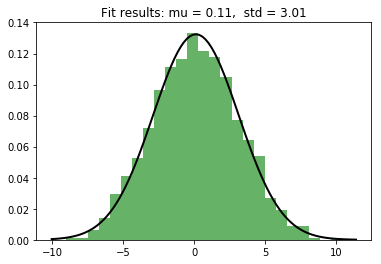

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate some data for this demonstration.
data = norm.rvs(0, 3, size=1000)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

### Провести статистический анализ полученной выборки: 
### 1) Вывести числовые статистики

In [2]:
#Для возможности предобработки данных (например, исключения нечисловых значений) 

_data = data

In [3]:
#Среднее

np.mean(_data)

0.11156207915473788

In [4]:
#Минимальный и максимальный элемент

(np.min(_data), np.max(_data))

(-9.073112830775221, 10.417620382737109)

In [5]:
#Стандартное отклонение

np.std(_data)

3.013226223223383

In [6]:
#Медиана

np.median(_data)

0.07584300893472723

In [7]:
#Межквартильный размах(Interquartile range)
from scipy.stats import iqr

iqr(_data)

4.226264571531269

In [8]:
#Мода
import scipy.stats as st

st.mode(_data)

ModeResult(mode=array([-9.07311283]), count=array([1]))

In [9]:
#Асимметрия

st.skew(_data)

0.04246426990136706

In [10]:
#Эксцесс

st.kurtosis(_data)

-0.25987023278472776

### 2) Вывести гистограмму. "ящик с усами", график "квантиль-квантиль"

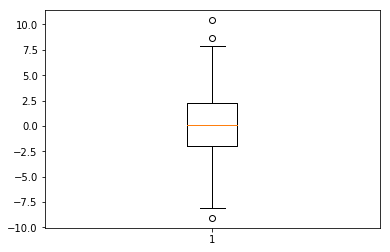

In [11]:
#"Ящик с усами" (BoxPlot)

fig, ax = plt.subplots()
ax.boxplot(_data)
plt.show()

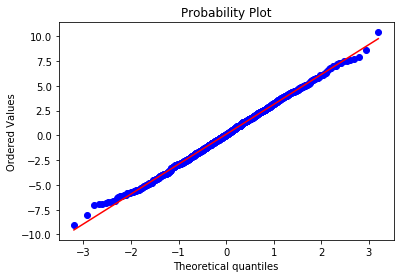

In [12]:
#График "квантиль-квантиль"

st.probplot(_data, dist="norm", plot=plt)
plt.show()

### 3) Применить критерий Колмогорова-Смирнова и x^2 критерий Пирсона для тестирования гипотез согласия.

In [13]:
#Критерий Колмогорова-Смирнова

st.kstest(_data, 'norm', args=(0, 3))

KstestResult(statistic=0.029590929687799084, pvalue=0.3403499461371895)

In [14]:
#Критерий хи-квадрат Пирсона(Pearson)

normTest = st.norm(0, 3).rvs(1000)
st.pearsonr(_data, normTest)

(0.05207696316205309, 0.09978942501674759)

## 2. Смоделировать n = 1000 случайных величин из заданных абсолютно непрерывных распределений согласно варианту(chi-squared distribution)

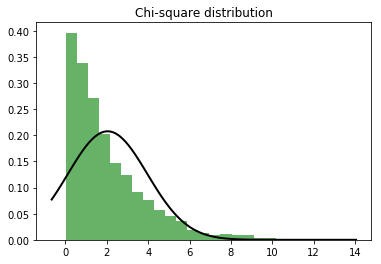

In [15]:
# Generate some data for this demonstration.
data = st.chi2.rvs(2, size=1000)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Chi-square distribution"
plt.title(title)

plt.show()

### Провести статистический анализ полученной выборки: 
### 1) Вывести числовые статистики

In [16]:
#Для возможности предобработки данных (например, исключения нечисловых значений) 

_data = data

In [17]:
#Среднее

np.mean(_data)

2.0381295524300507

In [18]:
#Минимальный и максимальный элемент

(np.min(_data), np.max(_data))

(0.001332629036519158, 13.38145145730612)

In [19]:
#Стандартное отклонение

np.std(_data)

1.9214429303912886

In [20]:
#Медиана

np.median(_data)

1.4807878787795312

In [21]:
#Межквартильный размах(Interquartile range)
from scipy.stats import iqr

iqr(_data)

2.223418173997709

In [22]:
#Мода
import scipy.stats as st

st.mode(_data)

ModeResult(mode=array([0.00133263]), count=array([1]))

In [23]:
#Асимметрия

st.skew(_data)

1.7201615294483514

In [24]:
#Эксцесс

st.kurtosis(_data)

3.819375074666473

### 2) Вывести гистограмму. "ящик с усами", график "квантиль-квантиль"

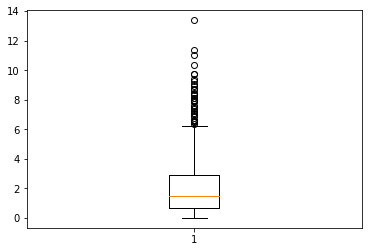

In [25]:
#"Ящик с усами" (BoxPlot)

fig, ax = plt.subplots()
ax.boxplot(_data)
plt.show()

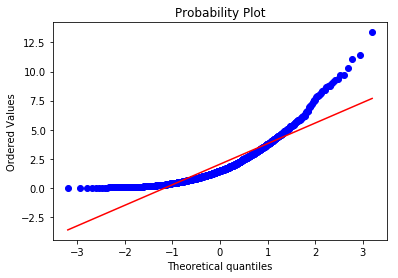

In [26]:
#График "квантиль-квантиль"

st.probplot(_data, plot=plt)
plt.show()

### 3) Применить критерий Колмогорова-Смирнова и x^2 критерий Пирсона для тестирования гипотез согласия.

In [27]:
#Критерий Колмогорова-Смирнова

testChi2 = st.chi2.rvs(2, size=1000)
st.ks_2samp(_data, testChi2)
#st.kstest(_data, 'chi2', args=(2, 3))

Ks_2sampResult(statistic=0.05199999999999999, pvalue=0.12984378016123646)

In [28]:
#Критерий хи-квадрат Пирсона(Pearson)

chi2Test = st.chi2.rvs(2, size=1000)
st.pearsonr(_data, chi2Test)

(0.011033139517895077, 0.7274851840930115)

## 3. Смоделировать выборку с засорениями объемом n = 1000 случайных величин. В качестве основного распределения взять нормальное распределение из задания 1.1, а засоряющего - распределение из задания 1.2 (согласно варианту). Использовать уровень засорения 5%(доля засоряющих значений в выборке)

In [29]:
norm = st.norm(0, 3)
res = norm.rvs(950)
buf = st.chi2.rvs(2, size=50)

data = np.concatenate([res, buf])
data

array([-3.84184712e+00,  2.25241238e+00, -4.32917652e+00, -2.16233691e-01,
        7.96349566e-01,  1.80737237e-01,  3.41120881e-01,  9.70364937e-01,
       -3.33137778e+00,  7.22443087e-01, -6.51485115e+00,  5.50432437e+00,
       -4.36459981e+00, -3.99560354e+00, -1.02291772e+00,  3.27445886e-01,
       -2.48776277e+00,  1.96171880e+00,  2.98036337e-01,  1.86170251e+00,
        3.73555422e+00,  1.33868333e+00, -4.78239812e+00, -3.14863148e+00,
        2.34754598e+00,  1.50839207e+00,  3.82675857e+00,  9.46541618e-01,
       -3.65316883e+00,  2.96571687e+00,  2.35734275e+00,  4.80987248e-03,
       -2.96457725e+00, -6.18442724e+00,  3.71591809e-01, -1.10759143e+00,
        1.33829539e-01,  3.82343613e+00,  2.20974903e+00,  2.46309951e+00,
       -2.66258543e+00,  4.37084497e+00, -1.32032181e+00,  3.94563450e-01,
        8.27332925e+00, -1.00471256e+00, -4.47416679e+00, -2.03162144e+00,
        1.64393681e+00, -3.98332254e+00, -1.35848500e-01,  3.35569918e+00,
        5.36703581e+00,  

### Провести статистический анализ полученной выборки: 
### 1) Вывести числовые статистики

In [30]:
#Для возможности предобработки данных (например, исключения нечисловых значений) 

_data = data

In [31]:
#Среднее

np.mean(_data)

0.02237727950139917

In [32]:
#Минимальный и максимальный элемент

(np.min(_data), np.max(_data))

(-8.794891723770515, 9.912392677082423)

In [33]:
#Стандартное отклонение

np.std(_data)

3.024067342786471

In [34]:
#Медиана

np.median(_data)

0.20172925326902436

In [35]:
#Межквартильный размах(Interquartile range)
from scipy.stats import iqr

iqr(_data)

4.274548568212729

In [36]:
#Мода
import scipy.stats as st

st.mode(_data)

ModeResult(mode=array([-8.79489172]), count=array([1]))

In [37]:
#Асимметрия

st.skew(_data)

-0.011438120969296812

In [38]:
#Эксцесс

st.kurtosis(_data)

-0.15301746456106313

### 2) Вывести гистограмму. "ящик с усами", график "квантиль-квантиль"

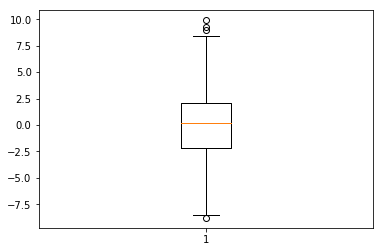

In [39]:
#"Ящик с усами" (BoxPlot)

fig, ax = plt.subplots()
ax.boxplot(_data)
plt.show()

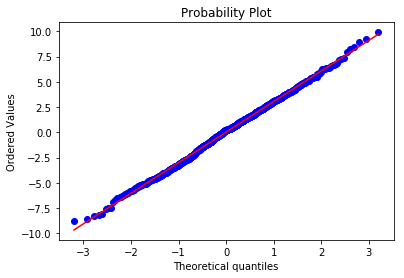

In [40]:
#График "квантиль-квантиль"

st.probplot(_data, dist="norm", plot=plt)
plt.show()

### 3) Применить критерий Колмогорова-Смирнова и x^2 критерий Пирсона для тестирования гипотез согласия.

In [41]:
#Критерий Колмогорова-Смирнова

st.kstest(_data, 'norm', args=(0, 3))

KstestResult(statistic=0.03216648655124987, pvalue=0.2471689427002799)

In [42]:
#Критерий хи-квадрат Пирсона(Pearson)

normTest = st.norm(0, 3).rvs(1000)
st.pearsonr(_data, normTest)

(0.033514313252441794, 0.28969654894497554)